## A dataset showing the descriptors on housing used to determine the tax paid by each residence.

The Assignment: Using the HousingData dataset to determine, the tax paid per residence in the TestData dataset

In [127]:
#Importing Libraries
import pandas as pd

#importing datasets
data = pd.read_excel(r'HousingData.xlsx')
testData = pd.read_csv(r'TestData.csv')

df = pd.DataFrame(data)

test = pd.DataFrame(testData)

#Drop duplicates if any
df=df.drop_duplicates()
test=test.drop_duplicates()

df

,PID,CRIM,AC,INDUS,LS,PR,RM,AGE,DIS,RAD,PTRATIO,DMT,LSTAT,MO,TAX
0,101,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,15.3,396.90,4.98,2.0,296.0
1,102,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,17.8,396.90,9.14,2.0,242.0
2,103,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,17.8,292.40,4.03,3.0,242.0
3,104,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,18.7,394.63,2.94,0.0,222.0
4,105,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,18.7,396.90,5.33,0.0,222.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,602,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,NaN,1.0,21.0,NaN,9.67,4.0,273.0
502,603,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,21.0,396.90,9.08,6.0,273.0
503,604,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,21.0,396.90,5.64,9.0,273.0
504,605,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,21.0,393.45,6.48,2.0,273.0


## Data Exploration

In [128]:
df.head()

,PID,CRIM,AC,INDUS,LS,PR,RM,AGE,DIS,RAD,PTRATIO,DMT,LSTAT,MO,TAX
0,101,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,15.3,396.90,4.98,2.0,296.0
1,102,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,17.8,396.90,9.14,2.0,242.0
2,103,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,17.8,292.40,4.03,3.0,242.0
3,104,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,18.7,394.63,2.94,0.0,222.0
4,105,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,18.7,396.90,5.33,0.0,222.0


In [129]:
df.columns

Index(['PID', 'CRIM', 'AC', 'INDUS', 'LS', 'PR', 'RM', 'AGE', 'DIS', 'RAD',
       'PTRATIO', 'DMT', 'LSTAT', 'MO', 'TAX'],
      dtype='object')

In [130]:
df.shape

(506, 15)

In [131]:
df.describe()

,PID,CRIM,AC,INDUS,LS,PR,RM,AGE,DIS,RAD,PTRATIO,DMT,LSTAT,MO,TAX
count,506.000000,504.000000,506.000000,506.000000,504.000000,503.000000,502.000000,502.00000,503.000000,504.000000,503.000000,502.000000,505.000000,504.000000,505.000000
mean,353.500000,3.604056,11.363636,11.136779,0.069444,0.554164,6.285307,68.53008,3.796207,9.492063,18.443539,305.414530,12.654099,0.644841,407.726733
std,146.213884,8.609134,23.322453,6.860353,0.254461,0.115830,0.704098,28.13882,2.103234,8.676649,2.165602,142.836519,7.148104,1.794307,168.312294
min,101.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.90000,1.129600,1.000000,12.600000,0.320000,1.730000,0.000000,187.000000
25%,227.250000,0.082155,0.000000,5.190000,0.000000,0.449000,5.885500,45.02500,2.100350,4.000000,17.350000,293.572500,6.930000,0.000000,279.000000
50%,353.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.50000,3.215700,5.000000,19.000000,386.910000,11.340000,0.000000,330.000000
75%,479.750000,3.674808,12.500000,18.100000,0.000000,0.624000,6.623500,93.97500,5.164950,24.000000,20.200000,394.997500,16.960000,0.000000,666.000000
max,606.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.00000,12.126500,24.000000,22.000000,396.900000,37.970000,19.000000,711.000000


In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 506 entries, 0 to 505
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   PID      506 non-null    int64  
 1   CRIM     504 non-null    float64
 2   AC       506 non-null    float64
 3   INDUS    506 non-null    float64
 4   LS       504 non-null    float64
 5   PR       503 non-null    float64
 6   RM       502 non-null    float64
 7   AGE      502 non-null    float64
 8   DIS      503 non-null    float64
 9   RAD      504 non-null    float64
 10  PTRATIO  503 non-null    float64
 11  DMT      502 non-null    float64
 12  LSTAT    505 non-null    float64
 13  MO       504 non-null    float64
 14  TAX      505 non-null    float64
dtypes: float64(14), int64(1)
memory usage: 63.2 KB


In [133]:
#Since values are few, we drop them
df.dropna(inplace=True)

In [134]:
#Null values
df.isnull().sum()

PID        0
CRIM       0
AC         0
INDUS      0
LS         0
PR         0
RM         0
AGE        0
DIS        0
RAD        0
PTRATIO    0
DMT        0
LSTAT      0
MO         0
TAX        0
dtype: int64

In [135]:
df.nunique()

PID        487
CRIM       485
AC          26
INDUS       76
LS           2
PR          81
RM         433
AGE        344
DIS        396
RAD          9
PTRATIO     46
DMT        363
LSTAT      438
MO          13
TAX         66
dtype: int64

From the of the unique values, LS, RAD are categorical records

## Splitting data into Training and Testing Data

In [136]:
from sklearn.model_selection import train_test_split

X = df.drop(['TAX'], axis=1)
y = df['TAX']
X

,PID,CRIM,AC,INDUS,LS,PR,RM,AGE,DIS,RAD,PTRATIO,DMT,LSTAT,MO
0,101,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,15.3,396.90,4.98,2.0
1,102,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,17.8,396.90,9.14,2.0
2,103,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,17.8,292.40,4.03,3.0
3,104,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,18.7,394.63,2.94,0.0
4,105,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,18.7,396.90,5.33,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499,600,0.17783,0.0,9.69,0.0,0.585,5.569,73.5,2.3999,6.0,19.2,395.77,15.10,5.0
500,601,0.22438,0.0,9.69,0.0,0.585,6.027,79.7,2.4982,6.0,19.2,396.90,14.33,8.0
502,603,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,21.0,396.90,9.08,6.0
503,604,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,21.0,396.90,5.64,9.0


In [137]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

train_data = X_train.join(y_train)
train_data

,PID,CRIM,AC,INDUS,LS,PR,RM,AGE,DIS,RAD,PTRATIO,DMT,LSTAT,MO,TAX
74,175,0.07896,0.0,12.83,0.0,0.4370,6.273,6.0,4.2515,5.0,18.7,394.92,6.78,0.0,398.0
51,152,0.04337,21.0,5.64,0.0,0.4390,6.115,63.0,6.8147,4.0,16.8,101.00,9.43,0.0,243.0
138,239,0.24980,0.0,21.89,0.0,0.6240,5.857,98.2,1.6686,4.0,21.2,392.04,21.32,0.0,437.0
379,480,17.86670,0.0,18.10,0.0,0.6710,6.223,100.0,1.3861,24.0,20.2,19.50,21.78,10.0,666.0
179,280,0.05780,0.0,2.46,0.0,0.4880,6.980,58.4,2.8290,3.0,17.8,396.90,5.04,0.0,193.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
404,505,41.52920,0.0,18.10,0.0,0.6930,5.531,85.4,1.6074,24.0,20.2,329.46,27.38,1.0,666.0
221,322,0.40771,0.0,6.20,1.0,0.5070,6.164,91.3,3.0480,8.0,17.4,395.24,21.46,0.0,307.0
502,603,0.04527,0.0,11.93,0.0,0.5730,6.120,76.7,2.2875,1.0,21.0,396.90,9.08,6.0,273.0
204,305,0.02009,95.0,2.68,0.0,0.4161,8.034,31.9,5.1180,4.0,14.7,390.55,2.88,0.0,224.0


array([[<Axes: title={'center': 'PID'}>,
        <Axes: title={'center': 'CRIM'}>, <Axes: title={'center': 'AC'}>,
        <Axes: title={'center': 'INDUS'}>],
       [<Axes: title={'center': 'LS'}>, <Axes: title={'center': 'PR'}>,
        <Axes: title={'center': 'RM'}>, <Axes: title={'center': 'AGE'}>],
       [<Axes: title={'center': 'DIS'}>, <Axes: title={'center': 'RAD'}>,
        <Axes: title={'center': 'PTRATIO'}>,
        <Axes: title={'center': 'DMT'}>],
       [<Axes: title={'center': 'LSTAT'}>,
        <Axes: title={'center': 'MO'}>, <Axes: title={'center': 'TAX'}>,
        <Axes: >]], dtype=object)

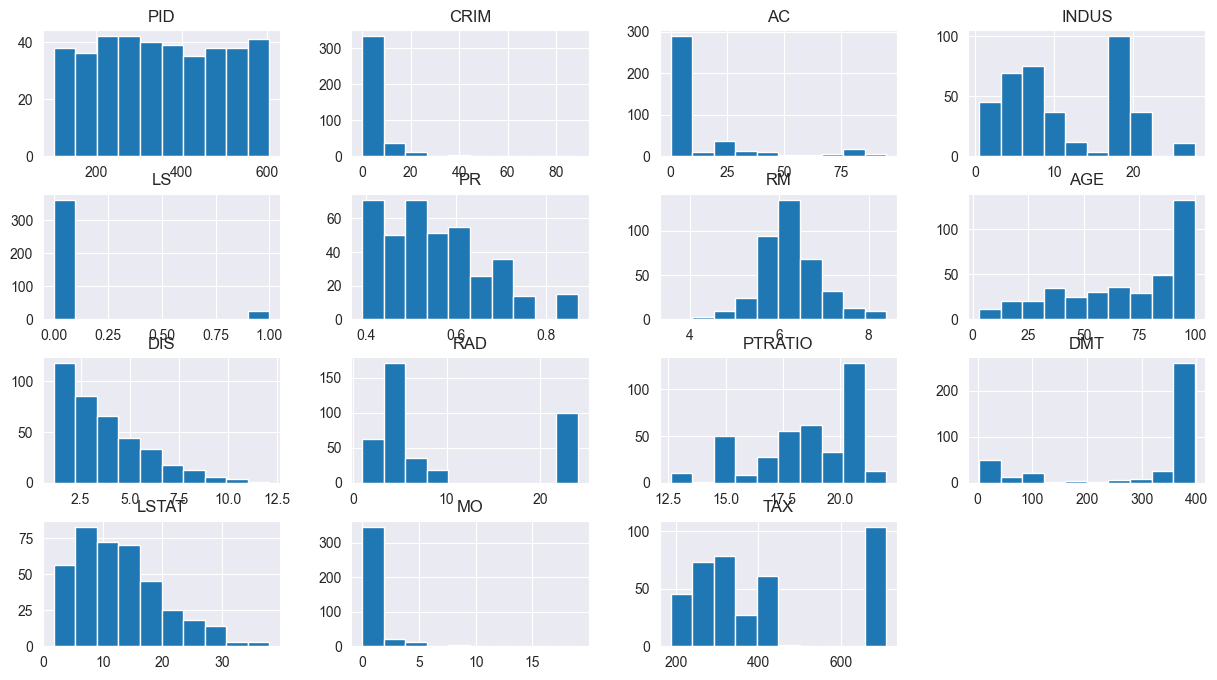

In [138]:
#Visualization of the train_data
train_data.hist(figsize= (15,8))

In [139]:
# Correlation Matrix to determine relationships of variables with the target variable
train_data.corr()

,PID,CRIM,AC,INDUS,LS,PR,RM,AGE,DIS,RAD,PTRATIO,DMT,LSTAT,MO,TAX
PID,1.000000,0.407457,-0.082477,0.377626,-0.017150,0.374405,-0.091701,0.207970,-0.280832,0.699604,0.313994,-0.275200,0.280231,0.261913,0.678789
CRIM,0.407457,1.000000,-0.194730,0.394050,-0.056068,0.404959,-0.185936,0.350609,-0.369220,0.624267,0.298363,-0.311827,0.422654,0.249647,0.578444
AC,-0.082477,-0.194730,1.000000,-0.517420,-0.064729,-0.506219,0.300668,-0.554870,0.655456,-0.304624,-0.358957,0.114976,-0.404090,-0.098525,-0.310528
INDUS,0.377626,0.394050,-0.517420,1.000000,0.060821,0.763645,-0.414476,0.662007,-0.703324,0.573745,0.355682,-0.174426,0.612161,0.159709,0.694306
LS,-0.017150,-0.056068,-0.064729,0.060821,1.000000,0.093435,0.046218,0.100108,-0.105304,-0.024120,-0.117406,0.073294,-0.032525,-0.084229,-0.049298
PR,0.374405,0.404959,-0.506219,0.763645,0.093435,1.000000,-0.342129,0.725647,-0.756722,0.585220,0.148638,-0.227001,0.597508,0.146038,0.650680
RM,-0.091701,-0.185936,0.300668,-0.414476,0.046218,-0.342129,1.000000,-0.259821,0.222566,-0.218586,-0.338523,0.133605,-0.621775,-0.094038,-0.310997
AGE,0.207970,0.350609,-0.554870,0.662007,0.100108,0.725647,-0.259821,1.000000,-0.732910,0.470535,0.235470,-0.117243,0.607099,0.157300,0.521062
DIS,-0.280832,-0.369220,0.655456,-0.703324,-0.105304,-0.756722,0.222566,-0.732910,1.000000,-0.487621,-0.210946,0.164190,-0.494687,-0.163512,-0.522818
RAD,0.699604,0.624267,-0.304624,0.573745,-0.024120,0.585220,-0.218586,0.470535,-0.487621,1.000000,0.483447,-0.349915,0.494938,0.259245,0.905844


<Axes: >

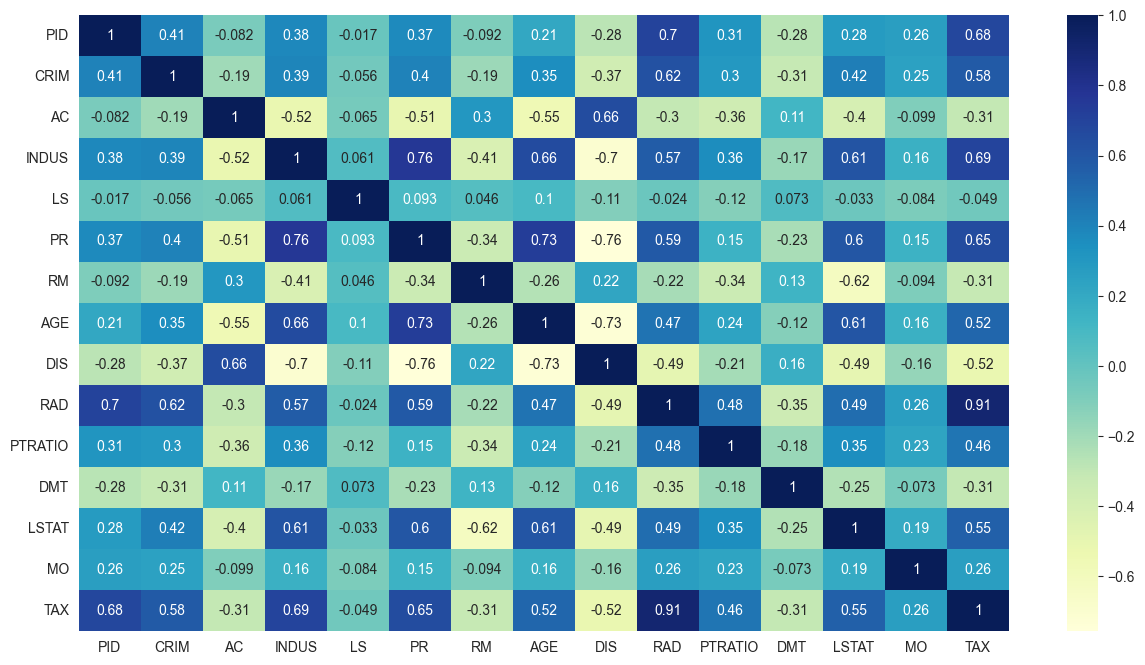

In [140]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot= True, cmap= "YlGnBu" )

LSTAT, RAD, PR & PID correlate positively and highly

## Pre-processing

In [141]:
import numpy as np
#Skewed Data
train_data['CRIM'] = np.log(train_data['CRIM'] + 1)
train_data['RAD'] = np.log(train_data['RAD'] + 1)
train_data['MO'] = np.log(train_data['MO'] + 1)

array([[<Axes: title={'center': 'PID'}>,
        <Axes: title={'center': 'CRIM'}>, <Axes: title={'center': 'AC'}>,
        <Axes: title={'center': 'INDUS'}>],
       [<Axes: title={'center': 'LS'}>, <Axes: title={'center': 'PR'}>,
        <Axes: title={'center': 'RM'}>, <Axes: title={'center': 'AGE'}>],
       [<Axes: title={'center': 'DIS'}>, <Axes: title={'center': 'RAD'}>,
        <Axes: title={'center': 'PTRATIO'}>,
        <Axes: title={'center': 'DMT'}>],
       [<Axes: title={'center': 'LSTAT'}>,
        <Axes: title={'center': 'MO'}>, <Axes: title={'center': 'TAX'}>,
        <Axes: >]], dtype=object)

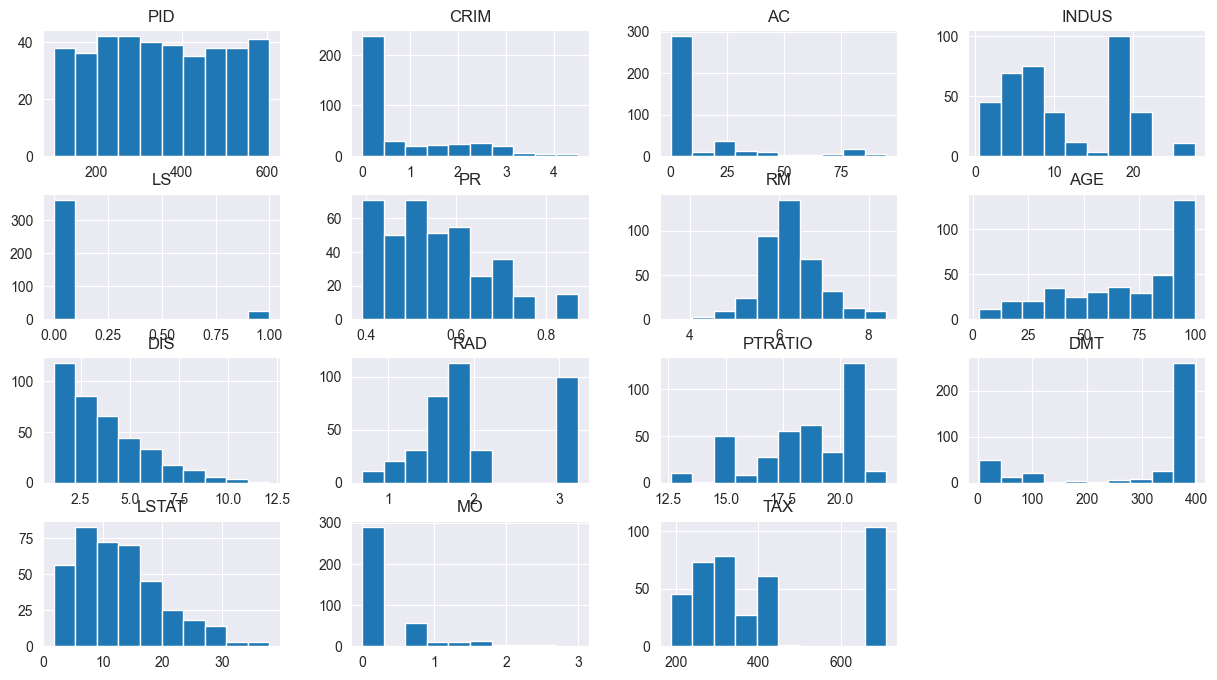

In [142]:
train_data.hist(figsize= (15,8))

## Training Model

In [143]:
from sklearn.linear_model import LinearRegression

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train, y_train = train_data.drop(['TAX'], axis=1), train_data['TAX']

x_train_s = scaler.fit_transform(x_train)

reg = LinearRegression()

reg.fit(x_train_s, y_train)

LinearRegression()

In [144]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84 entries, 0 to 83
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   PID      84 non-null     int64  
 1   CRIM     84 non-null     float64
 2   AC       84 non-null     float64
 3   INDUS    84 non-null     float64
 4   LS       84 non-null     int64  
 5   PR       84 non-null     float64
 6   RM       84 non-null     float64
 7   AGE      78 non-null     float64
 8   DIS      84 non-null     float64
 9   RAD      84 non-null     int64  
 10  PTRATIO  84 non-null     float64
 11  DMT      84 non-null     float64
 12  LSTAT    84 non-null     float64
 13  MO       84 non-null     int64  
 14  TAX      0 non-null      float64
dtypes: float64(11), int64(4)
memory usage: 10.5 KB


In [145]:
test.dropna(how='all',axis=0, inplace=True)
test.fillna(0, inplace=True)

In [146]:
test['AGE']=test['AGE'].fillna(test['AGE'].mean())
test.isnull().sum()

PID        0
CRIM       0
AC         0
INDUS      0
LS         0
PR         0
RM         0
AGE        0
DIS        0
RAD        0
PTRATIO    0
DMT        0
LSTAT      0
MO         0
TAX        0
dtype: int64

In [147]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84 entries, 0 to 83
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   PID      84 non-null     int64  
 1   CRIM     84 non-null     float64
 2   AC       84 non-null     float64
 3   INDUS    84 non-null     float64
 4   LS       84 non-null     int64  
 5   PR       84 non-null     float64
 6   RM       84 non-null     float64
 7   AGE      84 non-null     float64
 8   DIS      84 non-null     float64
 9   RAD      84 non-null     int64  
 10  PTRATIO  84 non-null     float64
 11  DMT      84 non-null     float64
 12  LSTAT    84 non-null     float64
 13  MO       84 non-null     int64  
 14  TAX      84 non-null     float64
dtypes: float64(11), int64(4)
memory usage: 10.5 KB


In [148]:
test['CRIM'] = np.log(test['CRIM'] + 1)
test['RAD'] = np.log(test['RAD'] + 1)
test['MO'] = np.log(test['MO'] + 1)

x_test, y_test = test.drop(['TAX'], axis=1), test['TAX']

x_test_s = scaler.fit_transform(x_test)

reg.score(x_test_s, y_test)

0.0

In [149]:
from sklearn.ensemble import RandomForestRegressor



forest = RandomForestRegressor()

forest.fit(x_train_s, y_train)

RandomForestRegressor()

In [150]:
forest.score(x_test_s, y_test)

0.0

In [151]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "n_estimators": [3,10,30],
    "max_features": [2,4,6,8]
}

grid_search = GridSearchCV(forest, param_grid, cv=5, scoring="neg_mean_squared_error", return_train_score=True)

grid_search.fit(x_train_s, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_features': [2, 4, 6, 8],
                         'n_estimators': [3, 10, 30]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [152]:
best_forest = grid_search.best_estimator_

In [153]:
best_forest.score(x_test_s, y_test)

0.0